debut


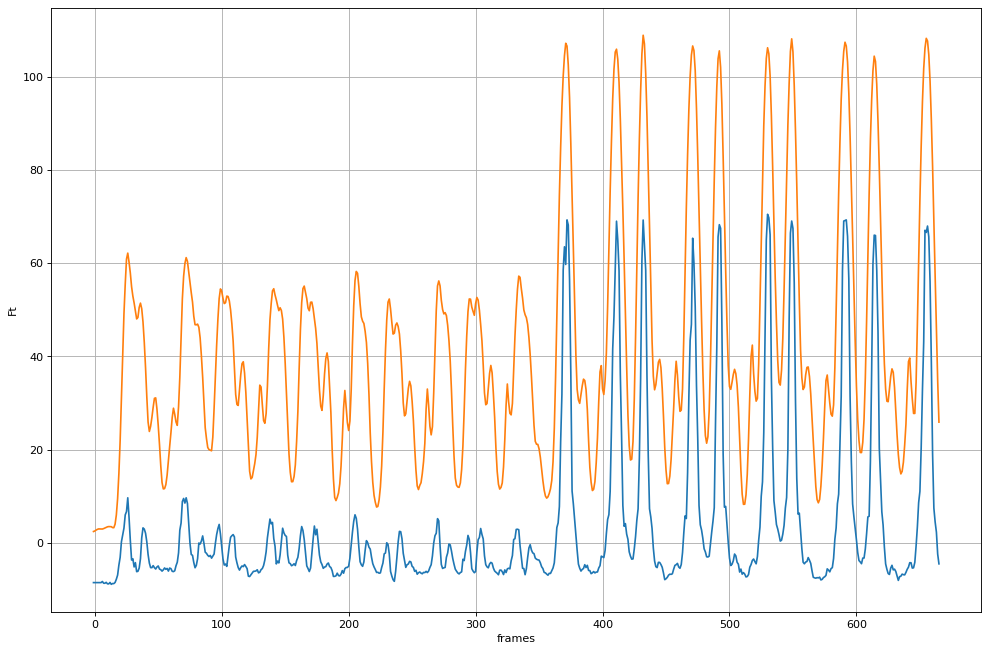

In [60]:
import json
import numpy
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd 
import scipy.stats as stats
'''boucler les fichiers json '''
xsens_path = '../Xsens_dosHz.p'
def load_json(i):
    #file_path = './json/Sujet'+i+'_1p_success.json'
    file_path = '../RNA/vueDos/Sujet'+i+'_1d_success.json'
    with open(file_path) as fl:
        sujet = json.load(fl)
    return sujet['frames']
with open(xsens_path,'rb') as file:
    xsens_data = pickle.load(file)
'''collecter les données et les transformer en tableau'''
def get_angles(angleName,sujet_frm,j,Y):
    angleList = []
    dico = {}
    l=len(Y)-1
    i = 0
    for key in sujet_frm.keys():
        fr = 'frame_'+str(i)
        xs_list = xsens_data['Sujet'+j+'_T1'].values.tolist()
        if fr == key:
            Y.append(i+l)
        else:
            del xs_list[i] 
    
        angles = sujet_frm[key]['angles']
        angleList.append(angles[angleName])    
        i = i+1  
        dico['Y'] = Y
        dico['angles'] = angleList
    return dico
def data_fusion(n,angleName,Y):
    data_list = []
    for i in n:
        sujet_frames = load_json(i)
        data = get_angles(angleName,sujet_frames,i,Y)
        data_list.append(data)
    return data_list

def get_xsAngle(n,angleName):
    list_angle =[]
    for i in n :
        angles = xsens_data['Sujet'+i+'_T1'][angleName]
        list_angle.append(angles.tolist())
    return list_angle
#name_angle = ['Fn','In','Rn','Fed','Aed','Feg','Aeg','Ft','Rt','It','Fcd','Fcg']
name_angle = ['Ft']
n = ['22']
for elmt in name_angle:
    Y=[]
    print('debut')
    XS = get_xsAngle(n,elmt)
    LEA = data_fusion(n,elmt,Y)
    plt.figure(figsize=(15,10), dpi=80)
    x = []
    y = []
    xs = []
    for k in range(len(n)):
        y.append(LEA[k]['angles'])
        xs.append(XS[k])
    x.append(LEA[k]['Y'])
    x = sum(x, [])
    y = sum(y,[])
    y = [elm*-1 for elm in y]
    xs = sum(xs,[])
    #dans le cas ou les frames de LEA est supérieur aux frames de xsens
    if(len(y)>len(xs)):
        diff = len(y)-len(xs)
        print(diff)
        j = 1
        while j<= diff:
            del y[j]
            print(j)
            del x[j]
            print('passer')
            j = j+1
    plt.plot(x,y,label = 'LEA')
    plt.plot(x,xs,label = 'Xsens')
    plt.grid()
    plt.xlabel('frames')
    plt.ylabel(elmt)    
    plt.show()



        

In [2]:
list = [1,2,3,4]
list = [i*10 for i in list]
print(list)

[10, 20, 30, 40]
